In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

#### Загрузим данные

- `program_name` – программа с уклоном в предметы (math&phys – математика и физика, russ&lit – русский и литература)
- `performance` – успеваемость пользователя (от 0 до 1, где 1 = 100%)
- `is_ege` – сдает ли пользователь ЕГЭ в этом году
- `age` – возраст

In [16]:
data = pd.read_csv('hw1.csv', sep=';', index_col=0)
data.head()

,program_name,performance,is_ege,age
1,math&phys,0.606203,no,17
2,math&phys,0.648850,yes,18
3,math&phys,0.729141,no,17
4,math&phys,0.863283,yes,17
5,math&phys,0.580673,no,17


### Задание 1
входят ли `program_name` в один доверительный интервал по успеваемости (пересекаются ли доверительные интервалы между группами)

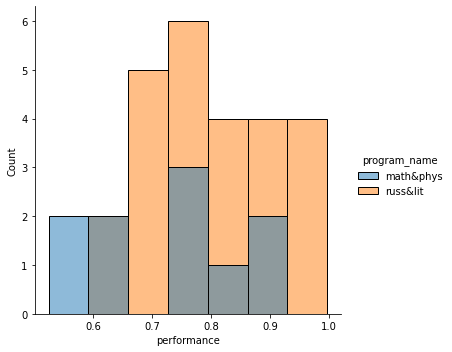

In [59]:
# На графике распределения переменной видно пересечение двух групп
sns.displot(data=data, x='performance', hue='program_name');

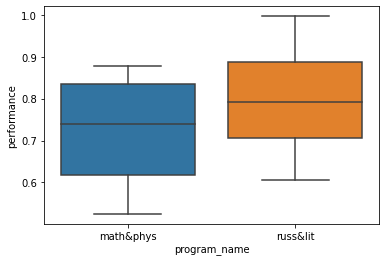

In [63]:
# Также пересечений видно на боксплотах
sns.boxplot(data=data, x='program_name', y='performance');

In [44]:
# Рассчитаем средние и метрики разброса для обеих групп
data_gb_pn = data.groupby('program_name', as_index=False)['performance']\
            .agg({'_n': 'count',
                  '_mu': 'mean',
                  '_var': 'var',
                  '_std': 'std'
                 })
data_gb_pn

,program_name,_n,_mu,_var,_std
0,math&phys,10,0.720606,0.015942,0.126262
1,russ&lit,25,0.797763,0.012154,0.110245


In [51]:
# Рассчитаем стандартную ошибку среднего SE для каждой группы
data_gb_pn['_se'] = data_gb_pn._std / np.sqrt(data_gb_pn._n)

# Рассчитаем 95% доверительный интервал для каждой группы
data_gb_pn['CI left'] = data_gb_pn._mu - data_gb_pn._se * 2
data_gb_pn['CI right'] = data_gb_pn._mu + data_gb_pn._se * 2

data_gb_pn

,program_name,_n,_mu,_var,_std,_se,CI left,CI right
0,math&phys,10,0.720606,0.015942,0.126262,0.039928,0.640750,0.800461
1,russ&lit,25,0.797763,0.012154,0.110245,0.022049,0.753665,0.841861


### Вывод
- Среднее значение успеваемости по программе русский и литература выше, чем по программе математика и физика
- Но доверительные интервалы двух групп пересекаются
- Исходя из этого нельзя сделать вывод, что успеваемость в двух группах значимо отличается

### Задание 2
у какой группы `is_ege` разброс по средней успеваемости больше

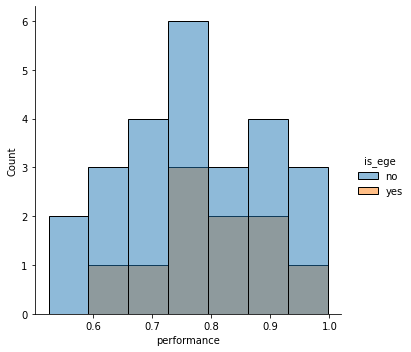

In [65]:
# На графике распределения переменной видно пересечение двух групп
sns.displot(data=data, x='performance', hue='is_ege');

In [64]:
# Рассчитаем средние и метрики разброса для обеих групп
data_gb_ege = data.groupby('is_ege', as_index=False)['performance']\
            .agg({'_n': 'count',
                  '_mu': 'mean',
                  '_var': 'var',
                  '_std': 'std'
                 })
data_gb_ege

,is_ege,_n,_mu,_var,_std
0,no,25,0.768338,0.016618,0.128912
1,yes,10,0.794170,0.008233,0.090735


In [69]:
# Помимо дисперсиии и стандартного отклонения рассчитаем коэффициент вариации
data_gb_ege['_var_coeff'] = (data_gb_ege._std / data_gb_ege._mu) * 100
data_gb_ege

,is_ege,_n,_mu,_var,_std,_var_coeff
0,no,25,0.768338,0.016618,0.128912,16.777995
1,yes,10,0.794170,0.008233,0.090735,11.425146


### Вывод
- Группа сдающих ЕГЭ в этом году по всем показателям имеет менее сильный разброс
- При этом у группы сдающих ЕГЭ выше средняя успеваемость
- Из этого можно сделать вывод, что учащиеся, которым сдавать в этом году ЕГЭ, более серьзено относятся к процессу обучение и поэтому имеют более высокие результаты